In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
data_visualize = pd.read_csv("DATE+WL+WEATHER.csv")

data_visualize

,plant_date,DoY,WL1(mm),WL2(mm),WL3(mm),WL4 (mm),WL5 (mm),Solar (W/m2),AirTemp (DegC),RH (%),(delta)PD
0,0.2083,237.2083,53,208,87,36,44,0,21.9,97,-0.1
1,0.4583,237.4583,59,62,93,36,50,113,22.3,100,-0.1
2,0.6250,237.6250,60,61,93,36,56,152,22.8,100,-0.1
3,0.6667,237.6667,58,60,91,36,51,141,23.3,100,-0.1
4,0.7083,237.7083,57,61,91,36,48,123,23.6,99,-0.1
...,...,...,...,...,...,...,...,...,...,...,...
407,40.8750,277.8750,39,42,42,36,44,0,14.5,93,-0.1
408,41.0000,278.0000,39,42,42,36,44,0,13.9,99,-0.1
409,41.0833,278.0833,39,42,42,36,44,0,14.4,100,-0.1
410,41.2083,278.2083,39,42,42,36,44,0,14.6,98,-0.1


In [3]:
LEARNING_RATE = 0.001
TRAINNING_STEP = 50000
DISPLAY_STEP = 10000

X_LABLE = len(data_visualize.columns) - 1

In [4]:
data = np.loadtxt("DATE+WL+WEATHER_np.csv", delimiter = ',', dtype = np.float32)

x = data[:, :X_LABLE]
y = data[:, [-1]]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

w = tf.Variable(tf.random.uniform([X_LABLE, 1], 0, 1))
bias = tf.Variable(random.random())

In [5]:
def compute_loss():
    hypothesis = tf.matmul(x_train, w) + bias
    loss = tf.reduce_mean((hypothesis - y_train) ** 2)
    
    return loss

optimizer = tf.optimizers.Adam(lr = LEARNING_RATE)

for step in range(1, TRAINNING_STEP + 1):
    optimizer.minimize(compute_loss, var_list = [w, bias])
    
    if step % DISPLAY_STEP == 0:
        print('step:', step, '\n', 'w:', '\n', w.numpy(), '\n', 'bias:', bias.numpy(), 
              '\n', 'loss:', compute_loss().numpy(), '\n')

step: 10000 
 w: 
 [[-0.27645797]
 [ 0.22110647]
 [-0.02664554]
 [-0.27299806]
 [ 0.08055732]
 [-0.46892747]
 [-0.06788661]
 [-0.0084533 ]
 [-0.01391932]
 [-0.22386155]] 
 bias: 0.22933134 
 loss: 5.693557 

step: 20000 
 w: 
 [[ 6.3470569e-03]
 [-6.9146524e-03]
 [ 4.2057430e-04]
 [ 4.5939856e-03]
 [-2.4096784e-03]
 [ 2.9347451e-02]
 [ 1.0395201e-02]
 [-4.0649291e-05]
 [-3.0292205e-03]
 [ 1.0886790e-04]] 
 bias: -0.044718504 
 loss: 0.0053818254 

step: 30000 
 w: 
 [[ 1.0506491e-02]
 [-1.0892247e-02]
 [ 4.3129164e-04]
 [ 4.2715957e-03]
 [-2.1233300e-03]
 [ 4.3075357e-02]
 [ 1.9284042e-02]
 [-3.9532308e-05]
 [-2.1680268e-03]
 [ 5.8546657e-04]] 
 bias: -0.049418394 
 loss: 0.005050245 

step: 40000 
 w: 
 [[ 1.0506518e-02]
 [-1.0892273e-02]
 [ 4.3129185e-04]
 [ 4.2715962e-03]
 [-2.1233282e-03]
 [ 4.3075453e-02]
 [ 1.9284096e-02]
 [-3.9532337e-05]
 [-2.1680242e-03]
 [ 5.8546901e-04]] 
 bias: -0.04941843 
 loss: 0.005050246 

step: 50000 
 w: 
 [[ 1.05065359e-02]
 [-1.08922925e-02]
 [ 4.3

In [6]:
y_hat = tf.matmul(x_test, w) + bias

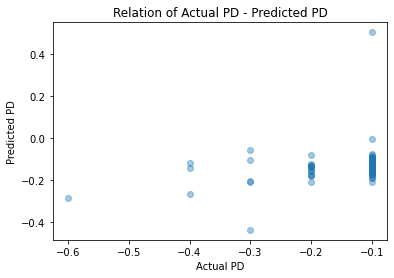

In [7]:
plt.scatter(y_test, y_hat, alpha = 0.4)
plt.xlabel('Actual PD')
plt.ylabel('Predicted PD')
plt.title('Relation of Actual PD - Predicted PD')
plt.show()

In [8]:
mse = mean_squared_error(y_test, y_hat)
rmse = np.sqrt(mse)

print("RMSE:", rmse)
print("MAE:", mean_absolute_error(y_test, y_hat))

RMSE: 0.09666149
MAE: 0.05722683
